<a href="https://colab.research.google.com/github/yeonghun00/stock_public/blob/main/index_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import ast

class Stock:
  def __init__(self, code):
    self.code = code
    self.headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}

  def get_price(self, start:int='20180501', interval='day'):
    url ='https://api.finance.naver.com/siseJson.naver?symbol=' + self.code + ' &requestType=1&startTime=' \
    + start + '&endTime=' + str(datetime.datetime.now().date().strftime("%Y%m%d")) +  '&timeframe=' + interval

    result = requests.get(url)
    bs_obj = BeautifulSoup(result.content, "html.parser")
    b = bs_obj.get_text()
    for i in ['\n', '\t', "\\", ' ']:
      b = b.replace(i,'')

    data = np.array(ast.literal_eval(b)[1:])

    dic = {'Date':list(map(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'), data[:,0])), \
      'Open':np.array(data[:,1], int), 'High':np.array(data[:,2], int), 'Low':np.array(data[:,3], int),\
       'Close':np.array(data[:,4], int), 'Volume':np.array(data[:,5], int)}

    df = pd.DataFrame(data=dic)
    df = df.set_index('Date')
    return df


In [22]:
stock = Stock('KOSPI')

In [24]:
df = stock.get_price('20000101')
for i in df.columns[:-1].values:
  df[i] = [x/100 for x in df[i]]

In [25]:
df = df.iloc[4900:]

In [26]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-07,2141.05,2147.01,2135.45,2144.29,425662
2019-11-08,2154.18,2155.94,2133.75,2137.23,574127
2019-11-11,2139.07,2139.07,2119.07,2124.09,617265
2019-11-12,2131.26,2140.94,2121.80,2140.92,610428
2019-11-13,2132.48,2133.37,2118.67,2122.45,664365
...,...,...,...,...,...
2021-06-04,3246.17,3246.19,3218.67,3240.08,1392319
2021-06-07,3244.59,3264.41,3233.40,3252.12,1733348
2021-06-08,3251.83,3264.67,3242.56,3247.83,1951319


In [27]:
ma5 = df['Close'].rolling(5).mean()
ma20 = df['Close'].rolling(20).mean()
ma60 = df['Close'].rolling(60).mean()
ma120 = df['Close'].rolling(120).mean()

mav5 = df['Volume'].rolling(5).mean()
mav20 = df['Volume'].rolling(20).mean()

In [28]:
df['ma5'] = ma5
df['ma20'] = ma20
df['ma60'] = ma60
df['ma120'] = ma120

df['mav5'] = mav5
df['mav20'] = mav20

t = df['Close'] > df['ma60']
for x in range(len(t)-1):
  if t[x+1] == True and t[x] == True:
    t[x] = False 
  

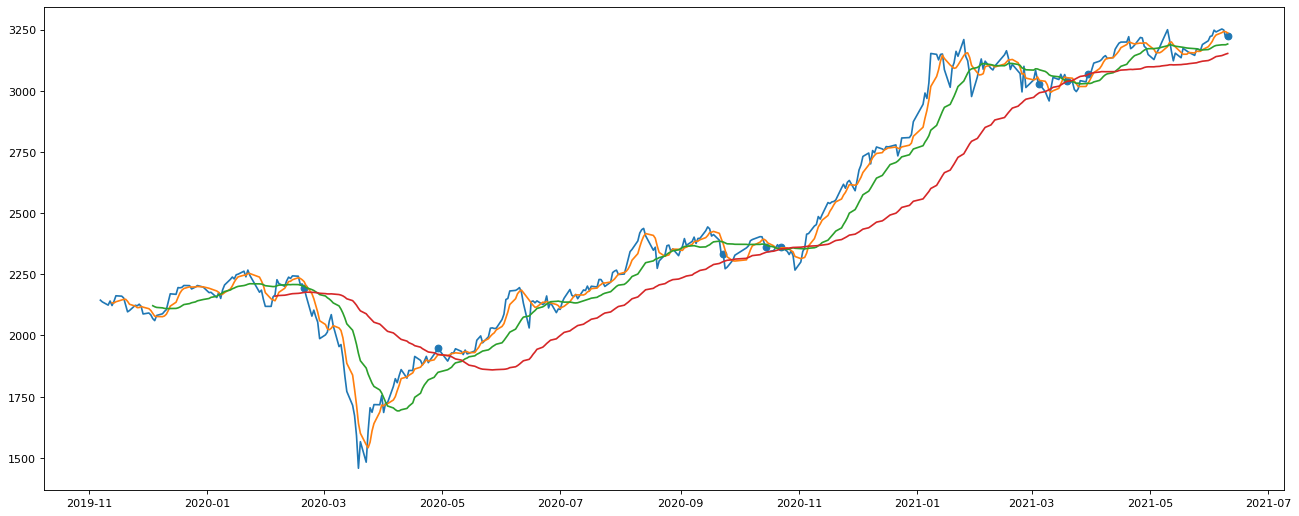

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 8), dpi=80)
plt.plot(df['Close'])
plt.plot(df['ma5'])
plt.plot(df['ma20'])
plt.plot(df['ma60'])
plt.scatter(x=df[t]['Close'].index, y=df[t]['Close'].values, marker='o');
plt.show()

In [30]:
t

Date
2019-11-07    False
2019-11-08    False
2019-11-11    False
2019-11-12    False
2019-11-13    False
              ...  
2021-06-04    False
2021-06-07    False
2021-06-08    False
2021-06-09    False
2021-06-10     True
Length: 394, dtype: bool